In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

In [111]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [112]:
train_df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [113]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [114]:
train_df.duplicated().sum()

0

In [115]:
num_positives = sum(train_df.is_claim)
num_negatives = len(train_df.is_claim) - num_positives

print(f"Positive to negative ratio. 1 : {round(num_negatives / num_positives, 1)}")

Positive to negative ratio. 1 : 14.6


<AxesSubplot: xlabel='age_of_car'>

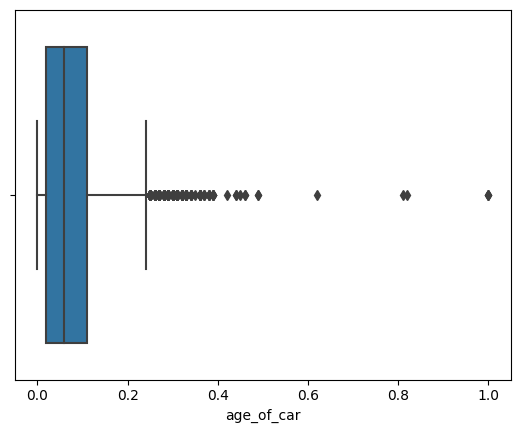

In [116]:
sns.boxplot(x='age_of_car', data=train_df)

Number of extreme values to be removed:  269
Number of negative examples will be lost:  260
Number of positive examples will be lost:  9


<AxesSubplot: xlabel='age_of_car'>

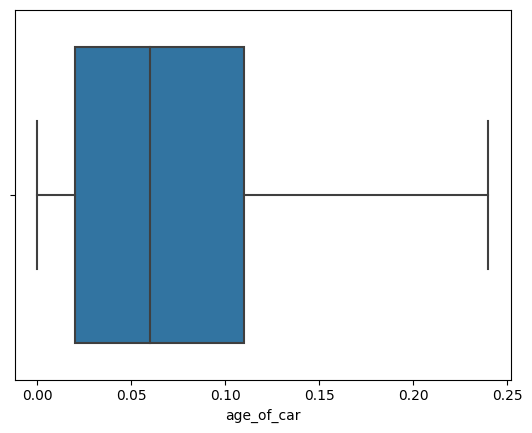

In [117]:
extreme_age_of_car_indices = train_df.age_of_car > train_df.age_of_car.quantile(0.995)
extreme_is_claim_counts = Counter(train_df.loc[extreme_age_of_car_indices].is_claim)
print("Number of extreme values to be removed: ", sum(extreme_age_of_car_indices))
print("Number of negative examples will be lost: ", extreme_is_claim_counts.get(0))
print("Number of positive examples will be lost: ", extreme_is_claim_counts.get(1))
sns.boxplot(x='age_of_car', data=train_df.loc[~extreme_age_of_car_indices])

In [118]:
train_df = train_df.loc[~extreme_age_of_car_indices]

In [119]:
train_df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


<AxesSubplot: xlabel='age_of_car', ylabel='Density'>

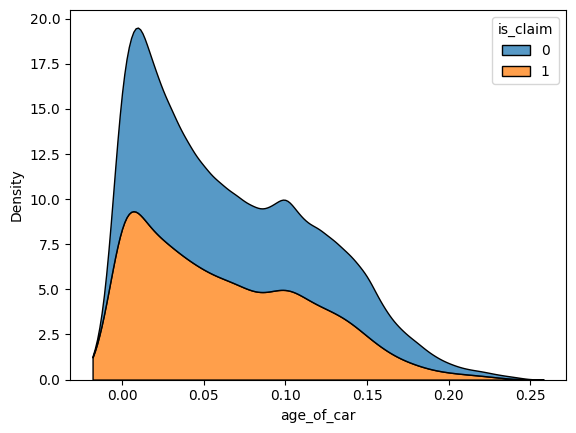

In [120]:
sns.kdeplot(data=train_df, x="age_of_car", hue="is_claim", multiple="stack", common_norm=False)

<AxesSubplot: xlabel='age_of_car', ylabel='Probability'>

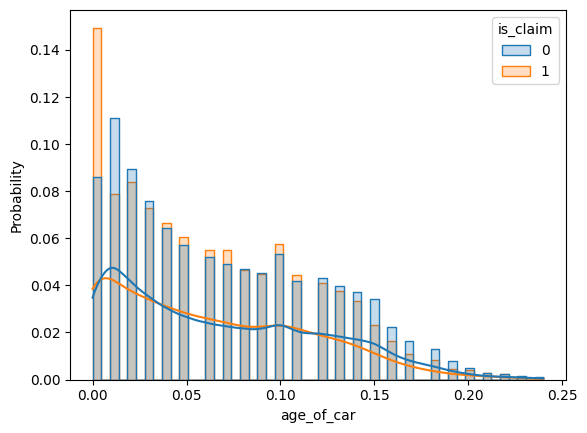

In [121]:
sns.histplot(
    train_df, x="age_of_car", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True, 
)

<AxesSubplot: xlabel='policy_tenure', ylabel='Density'>

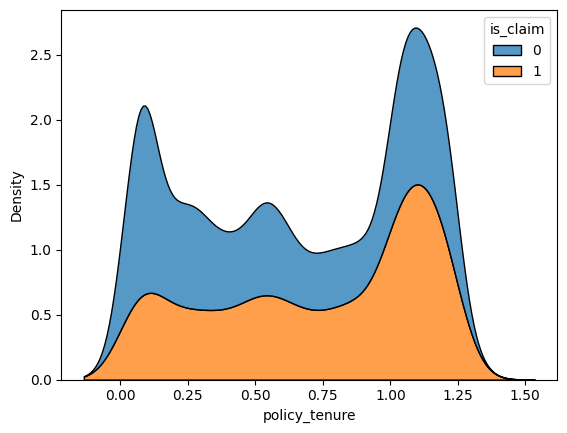

In [122]:
sns.kdeplot(data=train_df, x="policy_tenure", hue="is_claim", multiple="stack", common_norm=False)

<AxesSubplot: xlabel='policy_tenure', ylabel='Probability'>

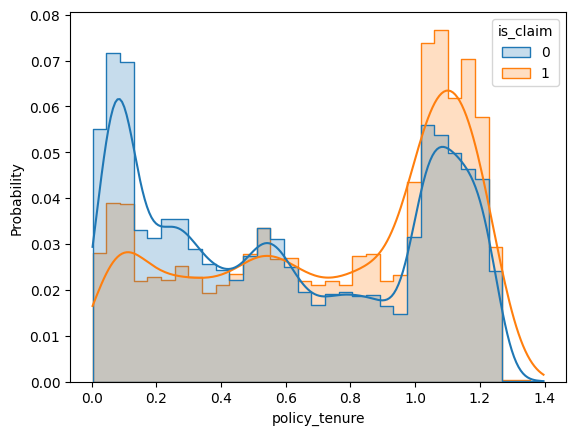

In [123]:
sns.histplot(
    train_df, x="policy_tenure", hue="is_claim", element="step",
    stat="probability", common_norm=False, kde=True
)

<AxesSubplot: xlabel='area_cluster,population_density'>

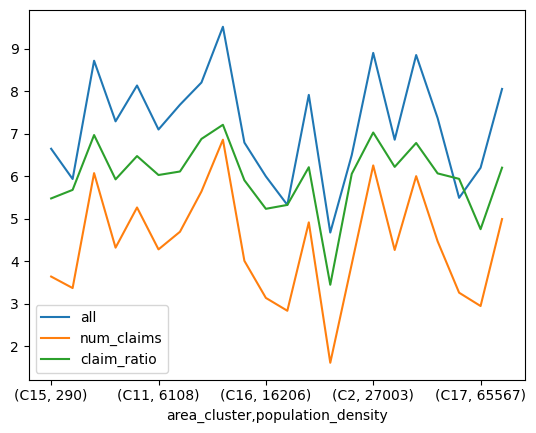

In [124]:
train_df.groupby(by=['area_cluster', 'population_density'])['is_claim'].agg(
    all=lambda x: np.log(len(x)),
    num_claims=lambda x: np.log(sum(x)),
    claim_ratio=lambda x: np.log(sum(x)) * 10 / np.log(len(x))
).sort_values(by='population_density').plot()

<AxesSubplot: xlabel='population_density', ylabel='Density'>

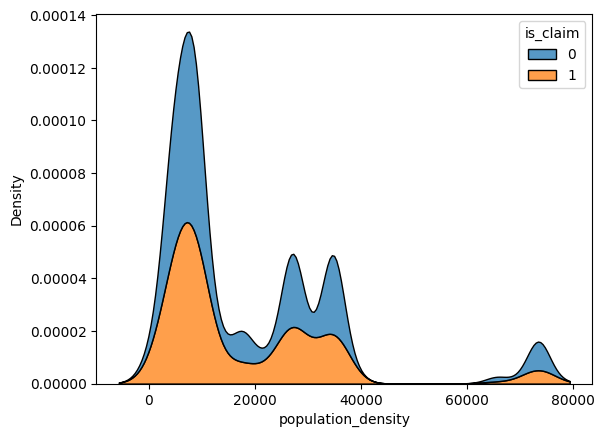

In [125]:
sns.kdeplot(data=train_df, x="population_density", hue="is_claim", multiple="stack", common_norm=False)

In [126]:
# Dropping policy_id since it is just ids.
train_df = train_df.drop(['policy_id'], axis=1)

In [127]:
# Transform columns into categorical that have less than 15 unique values
for col in train_df.columns:
    if len(train_df[f'{col}'].unique()) < 10:
        train_df[f'{col}'] = train_df[f'{col}'].astype('object')

In [128]:
train_df.population_density = train_df.population_density.astype('float64')

In [129]:
train_df['volume'] = np.log(train_df.length.astype('int64') * train_df.width * train_df.height * 1e-6)
train_df = train_df.drop(['length', 'width', 'height'], axis=1)

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58323 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58323 non-null  float64
 1   age_of_car                        58323 non-null  float64
 2   age_of_policyholder               58323 non-null  float64
 3   area_cluster                      58323 non-null  object 
 4   population_density                58323 non-null  float64
 5   make                              58323 non-null  object 
 6   segment                           58323 non-null  object 
 7   model                             58323 non-null  object 
 8   fuel_type                         58323 non-null  object 
 9   max_torque                        58323 non-null  object 
 10  max_power                         58323 non-null  object 
 11  engine_type                       58323 non-null  object 
 12  airb

In [131]:
num_df = train_df[['policy_tenure', 'volume']]
num_df = (num_df - num_df.min()) / (num_df.max() - num_df.min())              # standardization
num_normalized_df = train_df[['age_of_car', 'age_of_policyholder']]
num_df = pd.concat([num_df, num_normalized_df, train_df['is_claim']], axis=1)
num_df

,policy_tenure,volume,age_of_car,age_of_policyholder,is_claim
0,0.368130,0.000000,0.05,0.644231,0
1,0.480580,0.000000,0.02,0.375000,0
2,0.601457,0.000000,0.02,0.384615,0
3,0.643904,0.631707,0.11,0.432692,0
4,0.425902,0.267046,0.11,0.634615,0
...,...,...,...,...,...
58587,0.252782,0.267046,0.13,0.644231,0
58588,0.858671,0.000000,0.02,0.519231,0
58589,0.831862,0.000000,0.05,0.451923,0
58590,0.884975,0.573886,0.14,0.557692,0


([0, 1, 2, 3],
 [Text(0, 0, 'policy_tenure'),
  Text(1, 0, 'volume'),
  Text(2, 0, 'age_of_car'),
  Text(3, 0, 'age_of_policyholder')])

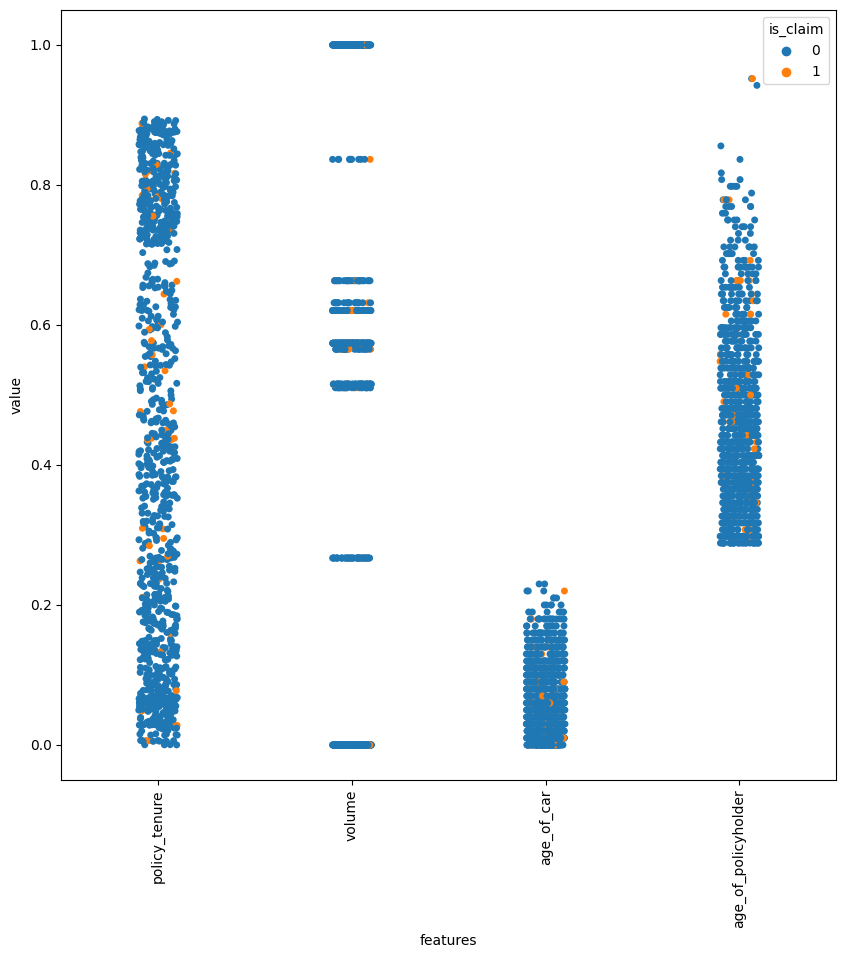

In [132]:
data = pd.melt(num_df.sample(1000),id_vars="is_claim",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.stripplot(x="features", y="value", hue="is_claim", data=data)
plt.xticks(rotation=90)

In [133]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category", "bool"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    all_mi_scores = []
    for random_state in range(0, 5):
        mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=random_state)
        all_mi_scores.append(mi_scores)
    all_mi_scores = np.mean(all_mi_scores, axis=0)
    all_mi_scores = pd.Series(all_mi_scores, name="MI Scores", index=X.columns)
    all_mi_scores = all_mi_scores.sort_values(ascending=False)
    return all_mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("feature importance")

In [134]:
y_target = train_df.is_claim.astype('int16')
y_target

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58323, dtype: int16

In [135]:
mi_scores = make_mi_scores(train_df.drop('is_claim', axis=1), y_target)

/tmp/ipykernel_71805/1486514896.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
/tmp/ipykernel_71805/1486514896.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
/tmp/ipykernel_71805/1486514896.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
/tmp/ipykernel_71805/1486514896.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X[colname], _ = X[colname].factorize()
/tmp/ipykernel_71805/1486514896.py:6: FutureWarning: In a future version, the Index 

policy_tenure                       0.002882
age_of_car                          0.002370
volume                              0.002290
population_density                  0.001842
area_cluster                        0.000849
age_of_policyholder                 0.000725
model                               0.000175
engine_type                         0.000175
gross_weight                        0.000169
displacement                        0.000169
max_torque                          0.000169
max_power                           0.000169
turning_radius                      0.000120
segment                             0.000107
is_adjustable_steering              0.000100
cylinder                            0.000093
is_front_fog_lights                 0.000071
is_brake_assist                     0.000061
is_driver_seat_height_adjustable    0.000059
fuel_type                           0.000051
Name: MI Scores, dtype: float64
steering_type                    4.817591e-05
make                  

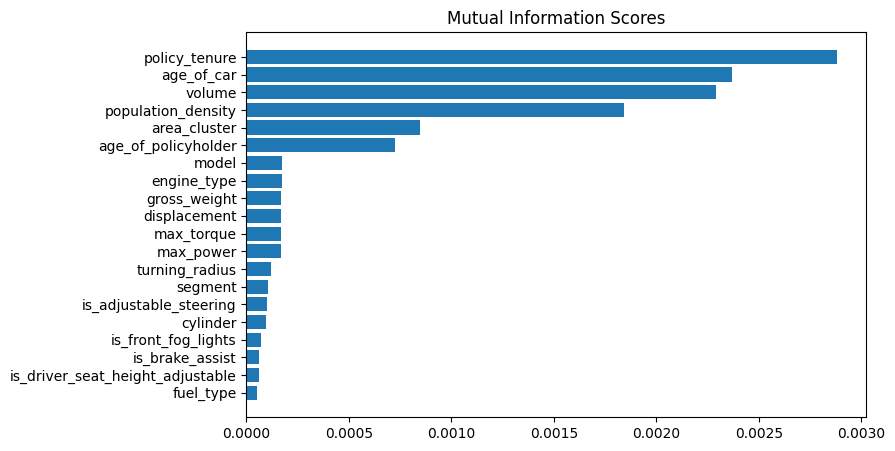

In [136]:
print(mi_scores.head(20))
print(mi_scores.tail(20))
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [137]:
selected_cols = ['policy_tenure', 'volume', 'age_of_car', 'age_of_policyholder',
                 'area_cluster', 'model']

In [138]:
train_df[selected_cols]

,policy_tenure,volume,age_of_car,age_of_policyholder,area_cluster,model
0,0.515874,8.948753,0.05,0.644231,C1,M1
1,0.672619,8.948753,0.02,0.375000,C2,M1
2,0.841110,8.948753,0.02,0.384615,C3,M1
3,0.900277,9.259222,0.11,0.432692,C4,M2
4,0.596403,9.079999,0.11,0.634615,C5,M3
...,...,...,...,...,...,...
58587,0.355089,9.079999,0.13,0.644231,C8,M3
58588,1.199642,8.948753,0.02,0.519231,C14,M1
58589,1.162273,8.948753,0.05,0.451923,C5,M1
58590,1.236307,9.230804,0.14,0.557692,C8,M6


In [139]:
# Categorical columns
cat_cols = [cname for cname in selected_cols if 
            train_df[cname].dtype in ["object", "bool"] or
            len(train_df[cname].unique()) <= 15]

num_cols_already_norm = ['age_of_car', 'age_of_policyholder']

# Select numerical columns
numerical_cols = [cname for cname in selected_cols if
                  cname not in num_cols_already_norm and
                  train_df[cname].dtype in ['int64', 'float64'] and
                  len(train_df[cname].unique()) > 15]

In [140]:
selected_cols = cat_cols + num_cols_already_norm + numerical_cols
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols_already_norm + numerical_cols}")

Categorical columns: ['volume', 'area_cluster', 'model']
Numerical columns: ['age_of_car', 'age_of_policyholder', 'policy_tenure']


In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('minmaxscaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols_already_norm + numerical_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [142]:
train_df_reduced = train_df[selected_cols]
train_df_reduced

,volume,area_cluster,model,age_of_car,age_of_policyholder,policy_tenure
0,8.948753,C1,M1,0.05,0.644231,0.515874
1,8.948753,C2,M1,0.02,0.375000,0.672619
2,8.948753,C3,M1,0.02,0.384615,0.841110
3,9.259222,C4,M2,0.11,0.432692,0.900277
4,9.079999,C5,M3,0.11,0.634615,0.596403
...,...,...,...,...,...,...
58587,9.079999,C8,M3,0.13,0.644231,0.355089
58588,8.948753,C14,M1,0.02,0.519231,1.199642
58589,8.948753,C5,M1,0.05,0.451923,1.162273
58590,9.230804,C8,M6,0.14,0.557692,1.236307


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = train_df_reduced
y = train_df['is_claim']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
X_val

,volume,area_cluster,model,age_of_car,age_of_policyholder,policy_tenure
55332,9.230804,C9,M6,0.03,0.490385,1.036070
20580,8.948753,C5,M1,0.00,0.528846,0.041128
21084,9.230804,C14,M6,0.11,0.442308,1.017170
2237,8.948753,C2,M1,0.02,0.413462,0.721993
51145,9.226613,C2,M9,0.13,0.326923,0.093720
...,...,...,...,...,...,...
37033,9.440229,C3,M4,0.01,0.615385,0.200675
6501,8.948753,C2,M1,0.02,0.451923,0.737252
51567,9.230804,C5,M6,0.08,0.375000,0.551405
38225,9.079999,C2,M3,0.07,0.365385,1.007474


In [145]:
# Ratios are preserved in both train and validation datasets.
print('Positive to all in train: ', sum(y_train) / len(y_train))
print('Positive to all in validation: ', sum(y_val) / len(y_val))

Positive to all in train:  0.06393330189892409
Positive to all in validation:  0.06480925846549507


In [146]:
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46658 entries, 28905 to 56682
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volume               46658 non-null  float64
 1   area_cluster         46658 non-null  object 
 2   model                46658 non-null  object 
 3   age_of_car           46658 non-null  float64
 4   age_of_policyholder  46658 non-null  float64
 5   policy_tenure        46658 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.5+ MB


In [148]:
sme = SMOTENC(random_state=42, categorical_features=[1, 2])
X_res, y_res = sme.fit_resample(X_train, y_train.astype(int))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5ec0513af0>
Traceback (most recent call last):
  File "/home/ming0531/miniconda3/envs/ming/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ming0531/miniconda3/envs/ming/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ming0531/miniconda3/envs/ming/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ming0531/miniconda3/envs/ming/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [149]:
print("Before resampling: ", Counter(y_train))
print("After resampling: ", Counter(y_res))

Before resampling:  Counter({0: 43675, 1: 2983})
After resampling:  Counter({0: 43675, 1: 43675})


In [154]:
result = pd.concat([X_res, y_res], axis=1)
result

,volume,area_cluster,model,age_of_car,age_of_policyholder,policy_tenure,is_claim
0,8.948753,C3,M1,0.010000,0.384615,0.141140,0
1,8.948753,C3,M1,0.020000,0.528846,0.403749,0
2,9.230804,C8,M6,0.070000,0.557692,1.022450,0
3,9.440229,C2,M4,0.090000,0.509615,0.500333,0
4,9.230804,C8,M6,0.070000,0.557692,1.094831,0
...,...,...,...,...,...,...,...
87345,9.230804,C13,M6,0.072553,0.367840,0.482739,1
87346,9.440229,C13,M4,0.044630,0.399395,0.351170,1
87347,8.948753,C5,M1,0.010000,0.460998,0.262010,1
87348,8.948753,C10,M1,0.042998,0.362502,0.073691,1


In [156]:
result.to_csv('/ssd8/ming/ML/train_preproceed.csv',index=False)